# Python Tricks

In [1]:
import pandas as pd
import numpy as np

## Plot Coordinates on Google Map

* Download the data from: https://drive.google.com/file/d/1VS292bhx_caAamNGY1bRrAySABMNSAhH/view?usp=sharing
* About gmplot: https://github.com/vgm64/gmplot

In [2]:
import gmplot

df = pd.read_csv('3D_spatial_network.csv')
print(df.shape)
df.head()

(434874, 4)


,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [3]:
sample_longitude_lst = df['LONGITUDE'][0:1000]
sample_latitude_lst =df['LATITUDE'][0:1000]

longitude_center = np.mean(sample_longitude_lst)
latitude_center = np.mean(sample_latitude_lst)
print(longitude_center, latitude_center)

9.73544303649998 56.97827767209999


In [4]:
# center the coordinates on Google map
gmap = gmplot.GoogleMapPlotter(latitude_center, longitude_center, 10)  # 10 is screen resolution
gmap.scatter(sample_latitude_lst, sample_longitude_lst, '# FF0000', size=40, marker=True)
gmap.heatmap(sample_latitude_lst, sample_longitude_lst)

gmap.draw("test_map.html")

Populating the interactive namespace from numpy and matplotlib


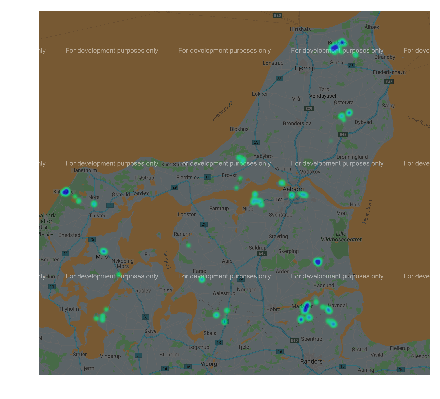

In [9]:
%pylab inline
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('test_map_plot.png', cv2.IMREAD_COLOR)
plt.figure(figsize = (7,7))
pylab.imshow(img)
pylab.axis('off')
pylab.show()

## Show Progress Bar for the Running Code

* About `tqdm`: https://github.com/tqdm/tqdm
* About "Python Spatial Analysis Library": https://github.com/pysal/pysal
  * API Reference: https://pysal.org/pysal/api.html
  * Examples for difference modules: https://github.com/pysal/pysal/tree/master/notebooks
  * This library looks cool
* Download the data from: https://drive.google.com/file/d/1VS292bhx_caAamNGY1bRrAySABMNSAhH/view?usp=sharing

In [3]:
from tqdm._tqdm_notebook import tqdm_notebook
from pysal.lib.cg import harcdist

In [4]:
tqdm_notebook.pandas()

df = pd.read_csv('3D_spatial_network.csv')
print(df.shape)
df.head()

(434874, 4)


,OSM_ID,LONGITUDE,LATITUDE,ALTITUDE
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [5]:
sample_longitude_lst = df['LONGITUDE'][0:1000]
sample_latitude_lst =df['LATITUDE'][0:1000]

longitude_center = np.mean(sample_longitude_lst)
latitude_center = np.mean(sample_latitude_lst)
print(longitude_center, latitude_center)

9.73544303649998 56.97827767209999


In [6]:
def calculate_dist(r):
    return harcdist((r['LONGITUDE'], r['LATITUDE']), (longitude_center, latitude_center))

df['dist2center'] = df.progress_apply(calculate_dist, axis=1)

#### NOTE
* In order to display the progress bar above, here're what I tried, not sure which one made it work...
  * Type `jupyter trust notebook-name.ipynb` in terminal before launching ipython notebook, this is to trust the notebook
  * Install `nodejs`, `nmp` through conda
  * Downgrade ipywidgets through `pip install ipywidgets==6.0.0`
  * Type `jupyter labextension install @jupyter-widgets/jupyterlab-manager` in the terminal before launching ipython notebook
    * This one got stuck, but not sure whether it helps, since it has highest vote in https://github.com/tqdm/tqdm/issues/451